In [4]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from tqdm.notebook import tqdm
from scipy.stats import mstats
import japanize_matplotlib



In [1]:

def folding_price_data(df, index2):
       


    DATA = pd.DataFrame({})


    for i in range(0,len(df), index2):

        try:
            temp = df.iloc[i:index2+i,:]
        except:
            temp = df.iloc[i:,:]
        M, m = max(temp["High"]), min(temp["Low"])
        open_p, close_p = temp['Open'].values[0], temp['Close'].values[-1]
        tp = pd.DataFrame({'Open':[open_p], 'High':[M], 'Low':[m], 'Close':[close_p]}, index=[temp.index.to_list()[0]])
        DATA = pd.concat([DATA, tp], axis=0)
        


    return DATA 


        

In [3]:
ticker = 'IYR'
price = yf.download(ticker, start='2011-08-01', end='2023-08-31', interval='1mo')

price

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2011-08-01  61.099998  61.099998  49.049999  57.220001  37.244724  418286500
2011-09-01  57.060001  57.380001  50.430000  50.570000  32.916210  231594400
2011-10-01  50.180000  58.180000  46.700001  57.240002  37.659748  243037900
2011-11-01  55.720001  57.529999  51.230000  55.139999  36.278088  172846900
2011-12-01  54.990002  57.660000  53.509998  56.810001  37.376846  116678700
...               ...        ...        ...        ...        ...        ...
2023-04-01  84.800003  86.050003  82.500000  85.680000  83.612350  140376800
2023-05-01  85.360001  85.889999  79.940002  82.230003  80.245613  124955000
2023-06-01  82.089996  87.040001  81.360001  86.540001  84.451599  129892000
2023-07-01  86.440002  90.339996  85.269997  88.050003  86.330795  125916200
2023-08-01  87.830002  88.220001  81.750000  85.339996  83.673706  122352100

[145 rows x 6 columns]

In [20]:
'''
data2 = yf.download(ticker, start='2011-01-01', end='2023-06-30', interval='1d')
switch = 0



def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)


def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return dt.date(year, month, day) if day else None

# 12日(休日の場合は直後の平日)に決済、決済後の平日に新規購入        

for i, j in data2.iterrows():
    

    if i.month % 3 != 2:
        data2.loc[i, 'Trade'] =  0
        continue

    
    if switch == 1:
        switch += 1
        data2.loc[i, 'Trade'] =  2
        continue
    
    
    
    
    
    if (switch == 0) & (i.day>= 12):
        data2.loc[i, 'Trade'] =  1
        switch += 1

    elif i.day in range(1, 11):
        data2.loc[i, 'Trade'] =  0
        
        switch = 0
    
    else:
        data2.loc[i, 'Trade'] =  0
        pass
    
    
        
    
data2 = data2.fillna({"Trade": float(0)})
data2['year'], data2['month'] = data2.index.year, data2.index.month
data2.head(100)
'''

'\ndata2 = yf.download(ticker, start=\'2011-01-01\', end=\'2023-06-30\', interval=\'1d\')\nswitch = 0\n\n\n\ndef get_nth_week(day):\n    return (day - 1) // 7 + 1\n\ndef get_nth_dow(year, month, day):\n    return get_nth_week(day), calendar.weekday(year, month, day)\n\n\ndef get_nth_dow_datetime(year, month, day):\n    return get_nth_week(day), date(year, month, day).weekday()\n\ndef get_date_of_nth_dow(year, month, nth, dow):\n    day = get_day_of_nth_dow(year, month, nth, dow)\n    return dt.date(year, month, day) if day else None\n\n# 12日(休日の場合は直後の平日)に決済、決済後の平日に新規購入        \n\nfor i, j in data2.iterrows():\n    \n\n    if i.month % 3 != 2:\n        data2.loc[i, \'Trade\'] =  0\n        continue\n\n    \n    if switch == 1:\n        switch += 1\n        data2.loc[i, \'Trade\'] =  2\n        continue\n    \n    \n    \n    \n    \n    if (switch == 0) & (i.day>= 12):\n        data2.loc[i, \'Trade\'] =  1\n        switch += 1\n\n    elif i.day in range(1, 11):\n        data2.loc[i, \'T

In [9]:
data2 = pd.read_csv('data/IYRprice_perday.csv', index_col=0, parse_dates=True)

In [8]:
fold_index = 3
predict = pd.read_csv("./prediction/" + 'IYR' + "3mo.csv", index_col=0, parse_dates=True)
price_and_predict = pd.concat([folding_price_data(price.loc["2010-02-01":"2023-08-01"], fold_index), predict.loc[:"2023-06-01",:]],axis=1)
price_and_predict

NameError: name 'price' is not defined

In [5]:
# graphization
def graph(df, save, file_name, simple_profit=False):
    if not simple_profit:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp = df["interest"].values

        initial = df["Asset"][0] 
        lis = np.cumsum(temp) + initial

        profit_month =np.array(lis)  / initial
        
        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp = df["Return"].values

        
        
        profit_month = np.array(temp)

        # 単利運用での資産額の計算
        total = 1 + np.cumsum(profit_month)

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values

        # ドローダウンの計算
        dd = max_assets - total
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax2 = ax1.twinx()
    indexes = [dt.strftime(df.index[i], '%Y-%m-%d') if i % 4 == 2 else '' for i in range(len(df))]

    ax1.set_xticks(list(range(len(df))))
    ax1.set_xticklabels(indexes,rotation=45)
    
    

    ax1.set_ylabel('cummulativeReturn')
    ax1.plot(total, label='Total')
    ax1.plot(max_assets, label='max Total')
    ax1.legend()
    

    ax2.set_ylabel('Drawdown(％)')
    ax2.bar(np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
    ax2.legend(loc='upper right')
    if save:
        fig.savefig(file_name+".png")

In [29]:




# plはprofit and loss です.

def order_pl(data, losscut, profitlevel, losscut2, profitlevel2, predict):
    open_price = data.query('Trade==2')['Open'].values[0]
    open_price = float(open_price)
    skip_num = np.where(data['Trade'].values==2)[0][0]
    
    switch = 0
    # ↓not used
    return_value = 0
    data = data.iloc[skip_num:, :]
    try:
        exit_idxs = np.where(data['Trade'].values==1)[1]
    except:
        exit_idxs = np.where(data['Trade'].values==1)[0]
        
    if len(exit_idxs) > 0:
        # データに手仕舞い日以降のデータが含まれていたら削除
        data = data.iloc[:exit_idxs[-1]+1]
    for i, row in data.iterrows():

        high_to_open = row["High"] - open_price
        open_to_low = open_price - row["Low"]
        if predict == 0: 
            
            # sell order 

            perspective_maxloss = high_to_open 
            perspective_maxprofit = open_to_low
            
            losscut_rate = losscut2
            profit_rate = profitlevel2
            
            director = -1    
        else:           
            
            # buy order
            
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            director = 1
            
            losscut_rate = losscut
            profit_rate = profitlevel
            pass
        
        

        profit_secure = perspective_maxprofit >= open_price * profit_rate
        loss_cut = perspective_maxloss >= open_price * losscut_rate
        if (not profit_secure) and (not loss_cut):
            # 利確・損切に到達していないとき
            continue
        elif profit_secure and loss_cut:
            
            
            assert False, "TODO: 日中でロスカットと利確ラインに到達した場合の処理を書く"
        elif profit_secure:
            profit = open_price * profit_rate
            message = 'crossed'
            print("check : Profit Line is crossed.")
            return profit, message, open_price, i
        else: # loss_cut
            profit = -open_price * losscut_rate
            message = 'losscut.'
            print("check : Losscut.")
            return profit, message, open_price, i

    try:
        data.query('Trade==1')['Close'].values[-1]
    except:
        close_price = data['Close'].tail(1).values
        return_value =  close_price - open_price
        return_value *= director
    else:
        return_value = data.query('Trade==1')['Close'].values[-1] - open_price
        return_value *= director


    

    
    return (return_value, 'None', open_price, i)


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = "crossed", "safe"
    elif message == 'losscut.':
        profitline, loss_cut = "not crossed", "Losscut."
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)
    
def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)

# This code(function) yields to totalreturn_per_year_list and dataframe of whole trades.
# If variable option is not incerted,  option is void, or empty.(空白)
# data2 is price data per day.

def calc(data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitlevel2, data2=data2):
    
    profit_count = 0 
    losscut_count = 0
    
    
    predicts = data["predict"].values
    # If "reverse" were the opposite, then What score...?
    if reverse:
        predicts = [int(not num) for num in predicts] 
        print("(入力前の)シグナルが0なら買います。")
    else:
        # reverse_ind = 1
        print("(入力前の)シグナルが0なら売ります。")
    

    Asset = 0
    
    loss_cut_sgn = "safe"
    profit_count = 0
    losscut_count = 0

    initiate_asset = data["Open"][0]
    
    totalreturn, df = 0, pd.DataFrame()
    for i,ind in enumerate(data.index) :       
        predict = predicts[i]
        
        year = int(ind.year)
        month = int(ind.month)
        
        # Example startが2011.7.12のとき、2011.7.1 ～ 2011.8.28までのデータを入手
        init = date(year, month, 1)
        
        # data2は日時データで一部をqueryで抜粋する。
        # ex.start : 2011.7のとき、intervalが1か月ならば、7月13日あたり(休日等考慮)に取引して、2011.8.12あたりに手じまいする。
        # となると, 2月が28日までなので、1か月先の8月28日まで入手する必要がある。
        
        end = date(year, month, 28) + relativedelta(months=6)
        data = data2.query("Date >=@init & Date <=@end")
        # arg : data, losscut, profitline, losscut2, profitline2, predict
        args = {'data':data,
                  'losscut':losscut_rate, 
                  'profitlevel':profitlevel,
                  'losscut2':losscut2, 
                  'profitlevel2':profitlevel2, 
                  'predict':predict
               }
        
        try:
            interest, message, open_price, Day = order_pl(**args)
        except Exception as e:
            print(ind)
            
            continue
        
        
        
        profitline, loss_cut_sgn = judge_message(message)
        profit_count += judge_count(message)[0]
        losscut_count +=  judge_count(message)[1] 
        
        ensuring_time = (Day - ind).days
        
        if predict ==1:
            leverage = 1
        else:
            leverage=1
        
        interest *= leverage
        totalreturn += interest
        Return = interest / open_price
        dic = {"signal":predict, "Return":Return, "totalreturn":totalreturn,"profitline":profitline,"loss_cut":loss_cut_sgn,"interest":interest, "open_price":open_price, 'settlement day':Day, 'ensuring_time':ensuring_time}
        
        df = pd.concat([df,
                       pd.DataFrame(dic, index=[ind])],
                       axis=0)
        
        

            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"initiate_asset:{initiate_asset}")
    

    
    return df


In [27]:

Date, enddate = '2014-08-01', "2023-06-01"    
data =  price_and_predict.loc[Date:enddate, :]
if FirstTake:
    loss_cut2, profitline2 = 0.1, 0.1
    FirstTake = False
lis = []
max_yield, tp1, sharp_ratio1, i1, j1 = 0, 0, 0, 0, 0
monthly = 3
for k in tqdm(range(375, 376, 50)):
    loss_cut = k * 0.01*0.01
    for j in range(26, 27, 10):       
        profitline = j * 0.01*0.01

        df = calc(
            data=data,
            losscut_rate=loss_cut, 
            profitlevel=profitline, 
            reverse=True,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=loss_cut2, 
            profitlevel2=profitline2, 
            data2=data2)  
        sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

        print(sharp_ratio*np.
              sqrt(12/monthly))
        lis.append(sharp_ratio*2)
        if sharp_ratio >= sharp_ratio1:

            last_losscut = loss_cut
            last_profitlevel = profitline



            sharp_ratio1 = sharp_ratio

for l in (range(140, 1141, 20)):
    loss_cut2 = l*0.01*0.01
    for m in range(15,1020, 10):       
        profitline2 = m*0.01*0.01

        # data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitline2, data2=data2

        df = calc(
            data=data,
            losscut_rate=last_losscut, 
            profitlevel=last_profitlevel, 
            reverse=True,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=loss_cut2, 
            profitlevel2=profitline2, 
            data2=data2)  
        sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

        print(sharp_ratio*np.sqrt(4))
        lis.append(sharp_ratio*2)
        if sharp_ratio >= sharp_ratio1:


            sell_last_losscut = loss_cut2
            sell_last_profitlevel = profitline2


            sharp_ratio1 = sharp_ratio




print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  

  0%|          | 0/1 [00:00<?, ?it/s]

(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 22
totalreturn: [-7.06142339] initiate_asset:71.5999984741211
-0.14323676703347477
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -28.577050028991696 initiate_asset:71.5999984741211
-0.21140875325453765
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 profit_count: 15
totalreturn: -32.02816481704711 initiate_asset:71.5999984741211
-0.24037639959054116
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -34.58103993530274 initiate_asset:71.5999984741211
-0.27020546861687295
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : L

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -33.586739855957035 initiate_asset:71.5999984741211
-0.2615825353570814
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check :

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 20 profit_count: 10
totalreturn: -35.96301486129761 initiate_asset:71.5999984741211
-0.27021365885718207
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 20 profit_count: 10
totalreturn: -35.622774863

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -51.15470992965699 initiate_asset:71.5999984741211
-0.42734214460740244
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.


check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -50.24577995986939 initiate_asset:71.5999984741211
-0.4156913575673527
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -50.16314996261597 initiate_asset:71.5999984741211
-0.41462366611918317
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
che

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -49.33684999008179 initiate_asset:71.5999984741211
-0.4038789020583226
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -49.254219992828375 initiate_asset:71.5999984741211
-0.40279820174122516
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -48.345290023040775 initiate_asset:71.5999984741211
-0.3908480535868509
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
ch

check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -36.64653491516113 initiate_asset:71.5999984741211
-0.29093044482413466
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is c

check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -29.303560008239742 initiate_asset:71.5999984741211
-0.22043720602242217
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalre

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -34.0247100440979 initiate_asset:71.5999984741211
-0.26669635957357535
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -31.070485095214845 initiate_asset:71.5999984741211
-0.23655291480910906
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -35.92211002273559 initiate_asset:71.5999984741211
-0.272378570654135
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Lossc

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -31.623810080718993 initiate_asset:71.5999984741211
-0.22756835735475525
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check 

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -54.150879904937746 initiate_asset:71.5999984741211
-0.4561382128794206
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
ch

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -53.24194993515015 initiate_asset:71.5999984741211
-0.44422091310478673
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
ch

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -52.33301996536255 initiate_asset:71.5999984741211
-0.4321333599345818
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
c

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -51.42408999557495 initiate_asset:71.5999984741211
-0.41991068907092355
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -32.911154925537105 initiate_asset:71.5999984741211
-0.25398388965519325
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -28.155240016174314 initiate_asset:71.5999984741211
-0.20947724369900003
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -35.3050200340271 initiate_asset:71.5999984741211
-0.27924373336962033
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -34.5

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -32.612425082397465 initiate_asset:71.5999984741211
-0.2513827019625164
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -36.241804965209965 initiate_asset:71.5999984741211
-0.28890991236

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -37.61211000747681 initiate_asset:71.5999984741211
-0.28743364009750066
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Los

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 9
totalreturn: -44.36413528366089 initiate_asset:71.5999984741211
-0.3658417571255847
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check :

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -57.22967987747192 initiate_asset:71.5999984741211
-0.4857800274634183
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -57.1470498802185 initiate_asset:71.5999984741211
-0.48468178260390327
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
ch

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -56.2381199104309 initiate_asset:71.5999984741211
-0.4724901637268294
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
chec

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -55.32918994064331 initiate_asset:71.5999984741211
-0.46012071649308156
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
ch

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -54.42025997085571 initiate_asset:71.5999984741211
-0.4476097662910493
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
che

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -32.8419399520874 initiate_asset:71.5999984741211
-0.2552785667139083
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Los

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -30.79476991577149 initiate_asset:71.5999984741211
-0.2283115195651831
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -35.1659900428772 initiate_asset:71.5999984741211
-0.2774196934967138
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -37.491524951171876 initiate_asset:71.5999984741211
-0.30059922649536835
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cros

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -39.302109992218014 initiate_asset:71.5999984741211
-0.3022304406244991
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check :

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 9
totalreturn: -46.67233528060914 initiate_asset:71.5999984741211
-0.3873473955036245
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 9
totalreturn: -46.39705528945923 initiate_asset:71.5999984741211
-0.3844001609522805
(入力前の)シグナルが0なら買います。
chec

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -60.30847985000611 initiate_asset:71.5999984741211
-0.5151920092075262
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -60.22584985275269 initiate_asset:71.5999984741211
-0.5140704431244112
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -59.316919882965095 initiate_asset:71.5999984741211
-0.501616374512281
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -58.407989913177495 initiate_asset:71.5999984741211
-0.48897449817718874
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
c

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -57.499059943389895 initiate_asset:71.5999984741211
-0.4761823511442021
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.


check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -31.02649996490479 initiate_asset:71.5999984741211
-0.23746996647356014
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut:

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 14 profit_count: 16
totalreturn: -35.83400983352661 initiate_asset:71.5999984741211
-0.2781079354305415
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line 

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -39.43106500549317 initiate_asset:71.5999984741211
-0.3181452510956293
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -38.20134494323731 initiate_asset:71.5999984741211
-0.3066061997641658
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -40.562279982757566 initiate_asset:71.5999984741211
-0.31216938118131893
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 8
totalreturn: -56.829365096282956 initiate_asset:71.5999984741211
-0.47685905098757236
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -63.22201982803345 initiate_asset:71.5999984741211
-0.542058390181725
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
chec

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -62.313089858245846 initiate_asset:71.5999984741211
-0.5293180958832019
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -61.40415988845825 initiate_asset:71.5999984741211
-0.5163843823315105
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -35.391959826660155 initiate_asset:71.5999984741211
-0.27923453507022516
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Lo

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -30.737059947204585 initiate_asset:71.5999984741211
-0.23650556448985682
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 profit_count: 15
totalreturn: -39.3616949836731 initiate_asset:71.5999984741211
-0.3140729286060459
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -40.3505450012207 initiate_asset:71.5999984741211
-0.3262261908573547
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -39.45106492919921 initiate_asset:71.5999984741211
-0.3177804466968735
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Loss

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -42.25227996749878 initiate_asset:71.5999984741211
-0.32639469166891805
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_coun

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 8
totalreturn: -59.54980508346557 initiate_asset:71.5999984741211
-0.5015847814154175
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
c

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -66.30081980056764 initiate_asset:71.5999984741211
-0.5708937619457113
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -66.21818980331422 initiate_asset:71.5999984741211
-0.5697203129366157
(入力

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -65.39188983078003 initiate_asset:71.5999984741211
-0.5578825310201897
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -65.30925983352662 initiate_asset:71.5999984741211
-0.5566890905021414
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
ch

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 23 profit_count: 7
totalreturn: -64.40032986373902 initiate_asset:71.5999984741211
-0.5434598821033986
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -32.93219983215332 initiate_asset:71.5999984741211
-0.2546402309183714
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -30.46714994354248 initiate_asset:71.5999984741211
-0.23410375741036293
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -43.97460994644165 initiate_asset:71.5999984741211
-0.36377399615330563
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -43.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -41.892484988403325 initiate_asset:71.5999984741211
-0.3404053673083658
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -48.67040988845825 initiate_asset:71.5999984741211
-0.39172233983818106
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -43.94227995224 initiate_asset:71.5999984741211
-0.3403310885532353
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-69.81441098] initiate_asset:71.5999984741211
-0.6078219880017773
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : L

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-68.90548101] initiate_asset:71.5999984741211
-0.5948218932852719
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-68.82285101] initiate_asset:71.5999984741211
-0.593627141278245
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-67.91392104] initiate_asset:71.5999984741211
-0.5803584398303165
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : L

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-67.00499107] initiate_asset:71.5999984741211
-0.566886645362634
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-66.92236108] initiate_asset:71.5999984741211


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -36.029699900817874 initiate_asset:71.5999984741211
-0.2878899087720065
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -36.17036983032227 initiate_asset:71.5999984741211
-0.2798526302322971
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -43.83557995529175 initiate_asset:71.5999984741211
-0.36104349124998547
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit 

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -47.3495048400879 initiate_asset:71.5999984741211
-0.39459633939595506
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Prof

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 19 profit_count: 11
totalreturn: -49.93057987899781 initiate_asset:71.5999984741211
-0.40085196769938114
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : L

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-57.46445644] initiate_asset:71.5999984741211
-0.4888537281529124
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is cro

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-72.64180096] initiate_asset:71.5999984741211
-0.6334850590650621
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-72.55917096] initiate_asset:71.5999984741211
-0.6322893636782027
(入力前の)シグナルが0な

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-71.65024099] initiate_asset:71.5999984741211
-0.6189856629974815
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : L

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-70.74131102] initiate_asset:71.5999984741211
-0.6054346662107343
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-69.74975105] initiate_asset:71.5999984741211
-0.5904193433666559
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -32.90806992645263 initiate_asset:71.5999984741211
-0.25685723633913965
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : P

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 14 profit_count: 16
totalreturn: -42.55152973098754 initiate_asset:71.5999984741211
-0.3418055027342684
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -48.088664920043946 initiate_asset:71.5999984741211
-0.40015182492513074
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -41.86406500549316 initiate_asset:71.5999984741211
-0.3364213048462753
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -44.27996006698608 initiate_asset:71.5999984741211
-0.33879710500531557
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-61.14284644] initiate_asset:71.5999984741211
-0.5043129505802713
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-60.88806645] initiate_asset:71.5999984741211
-0.

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 8
totalreturn: [-67.25447118] initiate_asset:71.5999984741211
-0.5616087628805052
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 8
totalreturn: [-67.08928118] initiate_asset:71.5999984741211
-0.5593752900344834
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-74.47763097] initiate_asset:71.5999984741211
-0.643972287992496
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lo

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-73.568701] initiate_asset:71.5999984741211
-0.6301381230447913
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-73.486071] initiate_asset:71.5999984741211
-0.6288696095691123
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crosse

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -37.291079760742186 initiate_asset:71.5999984741211
-0.2986896720080674
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -34.563059886169434 initiate_asset:71.5999984741211
-0.2749569886705033
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 profit_count: 15
totalreturn: -46.72249491043091 initiate_asset:71.5999984741211
-0.3834355359541741
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit L

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -49.00814491577148 initiate_asset:71.5999984741211
-0.4073059479037501
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -42.783545001220695 initiate_asset:71.5999984741211
-0.34355322006561884
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 18 profit_count: 12
totalreturn: -45.63972006149291 initiate_asset:71.5999984741211
-0.34888767508128415
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-63.10948645] initiate_asset:71.5999984741211
-0.5193620203922602
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lossc

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 8
totalreturn: [-69.66906116] initiate_asset:71.5999984741211
-0.581055922067404
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lo

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-77.38765094] initiate_asset:71.5999984741211
-0.669841948023927
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-77.30502094] initiate_asset:71.5999984741211
-0.6685703078554865
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 22 profit_count: 7
totalreturn: [-76.39609097] initiate_asset:71.5999984741211
-0.6544531146779612
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check :

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -34.83131976623535 initiate_asset:71.5999984741211
-0.2739843230763803
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Pr

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -33.066739894104 initiate_asset:71.5999984741211
-0.2601939844036222
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is c

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 profit_count: 15
totalreturn: -46.68169467086792 initiate_asset:71.5999984741211
-0.3841868078926717
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 pro

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 16 profit_count: 14
totalreturn: -44.580359667968764 initiate_asset:71.5999984741211
-0.35886402017089675
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -45.97201469345094 initiate_asset:71.5999984741211
-0.3504483893750225
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 17 profit_count: 13
totalreturn: -40.0440147392273 initiate_asset:71.5999984741211
-0.2885043987186417
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit 

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-66.47155573] initiate_asset:71.5999984741211
-0.5403357777132355
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut:

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-63.76995575] initiate_asset:71.5999984741211
-0.5055681613342823
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 8
totalreturn: [-70.68867548] initiate_asset:71.5999984741211
-0.5771033731249797
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Lossc

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 21 profit_count: 8
totalreturn: [-68.89523547] initiate_asset:71.5999984741211
-0.5518597956956163
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -34.163360064697265 initiate_asset:71.5999984741211
-0.26404741783663144
(入力前の)シグナルが0なら買います。
check : Pr

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -26.43687015075684 initiate_asset:71.5999984741211
-0.18838632128762567
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check :

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -39.54514496536255 initiate_asset:71.5999984741211
-0.30473533147030857
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 14 profit_count: 16
totalreturn: -36.085630015563964 initiate_asset:71.5999984741211
-0.26548794020322536
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 profit_count: 15
totalreturn: -36.910885085296634 initiate_asset:71.5999984741211
-0.25091433000649965
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Loss

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 15 profit_count: 15
totalreturn: -29.45028518600464 initiate_asset:71.5999984741211
-0.1761516221617491
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-52.85249629] initiate_asset:71.5999984741211
-0.3985901271550334
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Loss

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-57.99701098] initiate_asset:71.5999984741211
-0.43768722734732707
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Lossc

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-64.27242073] initiate_asset:71.5999984741211
-0.49746944727631387
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-61.59007075] initiate_asset:71.5999984741211
-0.46320137089002467
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 25
totalreturn: -30.88785995025635 initiate_asset:71.5999984741211
-0.2294719881361252
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -24.437630191040036 initiate_asset:71.5999984741211
-0.1669150357787924
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -42.01112493820191 initiate_asset:71.5999984741211
-0.32798802420002315
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
ch

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -33.521065039825444 initiate_asset:71.5999984741211
-0.24275379431421729
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Lin

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -24.087665152740477 initiate_asset:71.5999984741211
-0.1515868024814667
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
ch

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 14 profit_count: 16
totalreturn: -25.22873022766113 initiate_asset:71.5999984741211
-0.13966476738854836
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Li

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-56.09303625] initiate_asset:71.5999984741211
-0.428208497975321
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-55.67703626] initiate_asset:71.5999984741211
-0.42347182841635417
(入力前の)シグナルが0なら買います。
check : Losscu

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-61.23755094] initiate_asset:71.5999984741211
-0.4670587489209928
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Loss

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-67.51296069] initiate_asset:71.5999984741211
-0.526772798839971
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lo

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-64.83061071] initiate_asset:71.5999984741211
-0.49203321382181814
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 25
totalreturn: -32.676649928283695 initiate_asset:71.5999984741211
-0.2474530023240279
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -26.387500170898438 initiate_asset:71.5999984741211
-0.1860883064428374
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Pro

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -40.96448993606568 initiate_asset:71.5999984741211
-0.3124908251947041
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -36.93038500137329 initiate_asset:71.5999984741211
-0.27492458000398623
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
lo

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -27.49698511428833 initiate_asset:71.5999984741211
-0.1828475766694053
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
che

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 14 profit_count: 16
totalreturn: -28.63805018920899 initiate_asset:71.5999984741211
-0.17023031134164907
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Li

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-49.28522645] initiate_asset:71.5999984741211
-0.37768516723225243
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.


check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-64.8045009] initiate_asset:71.5999984741211
-0.500371976023944
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-64.4780909] initiate_asset:71.5999984741211
-0.4963600997164294
(入力前の)シグナルが0なら買います

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-70.99735065] initiate_asset:71.5999984741211
-0.5591945177165172
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-70.75350066] initiate_asset:71.5999984741211
-0.5559707151082007
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-68.07115067] initiate_asset:71.5999984741211
-0.5207796227851965
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-65.38880069] initiate_asset:71.5999984741211
-0.4861966237111032
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -31.25627011413575 initiate_asset:71.5999984741211
-0.23431795302244818
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Pro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -34.39328002471923 initiate_asset:71.5999984741211
-0.24927811945142525
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -40.33970496292115 initiate_asset:71.5999984741211
-0.3071487669918646
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Lin

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -31.849645064544674 initiate_asset:71.5999984741211
-0.22332752034733894
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 14 profit_count: 16
totalreturn: -32.04737015075684 initiate_asset:71.5999984741211
-0.20089428320065572
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 16 profit_count: 13
totalreturn: [-44.6290615] initiate_asset:71.5999984741211
-0.3352446139775715
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 16 profit_count: 13
totalreturn: [-44.022

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-68.04504086] initiate_asset:71.5999984741211
-0.5296302092876358
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.

check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-74.48174062] initiate_asset:71.5999984741211
-0.5915708338163832
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-74.23789062] initiate_asset:71.5999984741211
-0.5883068533973476
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit L

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-71.79939063] initiate_asset:71.5999984741211
-0.5558632164635847
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-71.55554063] initiate_asset:71.5999984741211
-0.5526414067951307
(入力前の)シグナルが0なら買います。
check : Loss

loss_cut: 20 profit_count: 9
totalreturn: [-69.11704065] initiate_asset:71.5999984741211
-0.5206961644193082
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 9
totalreturn: [-68.87319065] initiate_asset:71.5999984741211
-0.517531396167787
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -30.417025214385987 initiate_asset:71.5999984741211
-0.22683843575180088
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -29.399835204315192 initiate_asset:71.5999984741211
-0.19984510276285428
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : 

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -33.62844018096924 initiate_asset:71.5999984741211
-0.24129403838390115
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line i

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -30.099135108184814 initiate_asset:71.5999984741211
-0.20420015446706932
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Lin

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -29.38899020690918 initiate_asset:71.5999984741211
-0.1734824688398535
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -21.17154031677246 initiate_asset:71.5999984741211
-0.0957424844128149
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-54.06986633] initiate_asset:71.5999984741211
-0.39230136283407785
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-59.459711] initiate_asset:71.5999984741211
-0.4304375030327982
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-65.43546075] initiate_asset:71.5999984741211
-0.482171547008594
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Li

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-61.87553078] initiate_asset:71.5999984741211
-0.43930354917553943
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -29.101125045013426 initiate_asset:71.5999984741211
-0.21217492784130854
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscu

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -24.564865302276615 initiate_asset:71.5999984741211
-0.16857985369808953
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -27.358115351867678 initiate_asset:71.5999984741211
-0.19142083857568581
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -21.337860476684572 initiate_asset:71.5999984741211
-0.1391655802740024
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -17.437165412139898 initiate_asset:71.5999984741211
-0.10302758243672844
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -17.450260523986817 initiate_asset:71.5999984741211
-0.08208013817122538
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 15 profit_count: 14
totalreturn: [-39.9811216] initiate_asset:71.5999984741211
-0.2839752740477879
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line i

check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-64.32501094] initiate_asset:71.5999984741211
-0.4779205102464882
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-63.91882094] initiate_asset:71.5999984741211
-0.4731387984667039
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-69.9705207] initiate_asset:71.5999984741211
-0.52643517130053
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lossc

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-66.41059073] initiate_asset:71.5999984741211
-0.48259434197895823
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit 

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-63.17429076] initiate_asset:71.5999984741211
-0.44379098716069343
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-62.85066076] initiate_asset:71.5999984741211
-0.4399707690511438
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Pro

check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -32.60492520065308 initiate_asset:71.5999984741211
-0.24850935797980106
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Lossc

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -24.150205390167237 initiate_asset:71.5999984741211
-0.16179305722778461
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -28.38903038330078 initiate_asset:71.5999984741211
-0.20569290360755282
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -24.23594532699585 initiate_asset:71.5999984741211
-0.16532422179252668
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check 

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -23.9188304397583 initiate_asset:71.5999984741211
-0.14036542404502605
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -25.251030276489264 initiate_asset:71.5999984741211
-0.12989140424618478
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Lin

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-59.06360628] initiate_asset:71.5999984741211
-0.43321986946189844
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-58.56782629] initiate_asset:71.5999984741211
-0.42773402937011606
(入力前の)シグナルが0なら買いま

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-64.31603094] initiate_asset:71.5999984741211
-0.4681803010267308
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-70.62202068] initiate_asset:71.5999984741211
-0.5223474243188282
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit L

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-67.06209071] initiate_asset:71.5999984741211
-0.47883164769843667
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -29.101125045013426 initiate_asset:71.5999984741211
-0.21217492784130854
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crosse

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -25.209185309600834 initiate_asset:71.5999984741211
-0.17484515499254216
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 21
totalreturn: -29.021395350646973 initiate_asset:71.5999984741211
-0.20651875806960593
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -23.300700473022456 initiate_asset:71.5999984741211
-0.15711118648544908
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -19.736525397491455 initiate_asset:71.5999984741211
-0.12364640371833782
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
che

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -20.18990050811767 initiate_asset:71.5999984741211
-0.10517922326070427
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 15 profit_count: 14
totalreturn: [-43.71800157] initiate_asset:71.5999984741211
-0.3140650918795223
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-69.18133089] initiate_asset:71.5999984741211
-0.5155159660071461
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-68.77514089] initiate_asset:71.5999984741211
-0.

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-75.15708063] initiate_asset:71.5999984741211
-0.5664455523266888
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : 

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-71.59715066] initiate_asset:71.5999984741211
-0.5219950427325546
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-68.03722069] initiate_asset:71.5999984741211
-0.47874267520587716
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -31.705665229034423 initiate_asset:71.5999984741211
-0.23923197150698147
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -25.142525397491458 initiate_asset:71.5999984741211
-0.17105685795161132
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -30.351870379638672 initiate_asset:71.5999984741211
-0.2234244915633405
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -26.535305312347415 initiate_asset:71.5999984741211
-0.1857451115788358
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_c

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -26.65847042388916 initiate_asset:71.5999984741211
-0.1632905566263569
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -27.50442026062012 initiate_asset:71.5999984741211
-0.14665517329472197
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
ch

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-63.06578625] initiate_asset:71.5999984741211
-0.4623112658125268
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
che

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-69.17235089] initiate_asset:71.5999984741211
-0.5049972141810364
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-75.80858062] initiate_asset:71.5999984741211
-0.5615220462573944
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-72.24865065] initiate_asset:71.5999984741211
-0.5174136660556741
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit L

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -29.101125045013426 initiate_asset:71.5999984741211
-0.21217492784130854
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -24.309925337982175 initiate_asset:71.5999984741211
-0.1658546803703726
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -23.980005259704594 initiate_asset:71.5999984741211
-0.16350687865834565
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -25.263540469360347 initiate_asset:71.5999984741211
-0.17477695205417357
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -22.035885382843023 initiate_asset:71.5999984741211
-0.14393231396159908
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -22.92954049224853 initiate_asset:71.5999984741211
-0.12788857675532153
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 15 profit_count: 14
totalreturn: [-46.76883156] initiate_asset:71.5999984741211
-0.3367264851354194
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-73.63146084] initiate_asset:71.5999984741211
-0.5472567136511152
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-73.22527084] initiate_asset:71.5999984741211
-0.

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-80.02001057] initiate_asset:71.5999984741211
-0.6012693711653091
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.

loss_cut: 19 profit_count: 10
totalreturn: [-76.7837106] initiate_asset:71.5999984741211
-0.5604006628620167
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-76.4600806] initiate_asset:71.5999984741211
-0.5563651367638048
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Lin

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-73.22378063] initiate_asset:71.5999984741211
-0.5165751864461632
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lo

check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -32.34998523635864 initiate_asset:71.5999984741211
-0.24532062441281255
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Lossc

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -24.6782654258728 initiate_asset:71.5999984741211
-0.1660237471245553
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -32.314710375976574 initiate_asset:71.5999984741211
-0.24084665349282047
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -28.834665297698972 initiate_asset:71.5999984741211
-0.20580237501503482
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -29.398110408020028 initiate_asset:71.5999984741211
-0.18579424940591216
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -31.58391022033693 initiate_asset:71.5999984741211
-0.1798967070861104
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
los

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-68.05952621] initiate_asset:71.5999984741211
-0.5015697953365175
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-67.56374622] initiate_asset:71.5999984741211
-0.49

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-74.02867084] initiate_asset:71.5999984741211
-0.5408541770397604
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscu

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-80.99514056] initiate_asset:71.5999984741211
-0.5996584202081875
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit L

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-77.75884058] initiate_asset:71.5999984741211
-0.5590233108452268
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-77.43521059] initiate_asset:71.5999984741211
-0.5550144712824508
(入力前の)シグナルが0なら買います。
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -29.101125045013426 initiate_asset:71.5999984741211
-0.21217492784130854
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -26.49782532424927 initiate_asset:71.5999984741211
-0.18719097869663096
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -25.278405253601075 initiate_asset:71.5999984741211
-0.17549359661619715
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -27.226380465698238 initiate_asset:71.5999984741211
-0.1921477376364551
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -24.33524536819458 initiate_asset:71.5999984741211
-0.16386751376406428
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check 

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -25.669180476379385 initiate_asset:71.5999984741211
-0.15018844225970954
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
che

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 15 profit_count: 14
totalreturn: [-51.19176152] initiate_asset:71.5999984741211
-0.372204744315973
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line i

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-78.48778078] initiate_asset:71.5999984741211
-0.5828288834835766
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
c

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-85.20657051] initiate_asset:71.5999984741211
-0.6390983268785367
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit L

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-81.97027054] initiate_asset:71.5999984741211
-0.597778842064621
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-81.64664054] initiate_asset:71.5999984741211
-0.59369725799788
(入力前の)シグナルが0なら買います

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-78.41034057] initiate_asset:71.5999984741211
-0.5534374163371488
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Lo

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -32.99430524368286 initiate_asset:71.5999984741211
-0.2513336914838925
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -25.67058543319702 initiate_asset:71.5999984741211
-0.17509670965507926
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pro

loss_cut: 10 profit_count: 20
totalreturn: -34.27755037231446 initiate_asset:71.5999984741211
-0.25794532321558794
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -33.06360039

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -30.004205298614497 initiate_asset:71.5999984741211
-0.21501844894351899
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -31.118000407409657 initiate_asset:71.5999984741211
-0.19842076562498495
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 13 profit_count: 17
totalreturn: -33.83730020446777 initiate_asset:71.5999984741211
-0.19566377248809216
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-72.06170618] initiate_asset:71.5999984741211
-0.5287781723023083
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-82.54070074] initiate_asset:71.5999984741211
-0.

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-78.47880079] initiate_asset:71.5999984741211
-0.5708603691394073
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
c

loss_cut: 19 profit_count: 10
totalreturn: [-86.18170049] initiate_asset:71.5999984741211
-0.6367273422642504
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-85.85807049] initiate_asset:71.5999984741211
-0.6325786354762294
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit L

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-82.62177052] initiate_asset:71.5999984741211
-0.5916060403609033
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 19 profit_count: 10
totalreturn: [-82.29814053] i

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -27.3964650642395 initiate_asset:71.5999984741211
-0.19495305728953355
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -25.598565352630615 initiate_asset:71.5999984741211
-0.17811929552670971
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -26.576805247497557 initiate_asset:71.5999984741211
-0.18730942004988987
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -29.18922046203613 initiate_asset:71.5999984741211
-0.20921008259956742
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -26.634605353546153 initiate_asset:71.5999984741211
-0.1834363537740826
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check 

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -16.46622549362182 initiate_asset:71.5999984741211
-0.09376762100829529
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line i

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 14 profit_count: 15
totalreturn: [-41.19929655] initiate_asset:71.5999984741211
-0.30684613539784256
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line i

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-69.20010577] initiate_asset:71.5999984741211
-0.5169907374914099
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
che

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-75.47206549] initiate_asset:71.5999984741211
-0.5685068456729178
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-70.70136552] initiate_asset:71.5999984741211
-0.5163279433986067
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
c

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-65.93066555] initiate_asset:71.5999984741211
-0.46599308710389925
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -33.63862525100708 initiate_asset:71.5999984741211
-0.2572687464658786
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 23
totalreturn: -28.119485419464116 initiate_asset:71.5999984741211
-0.19818267411454402
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Lo

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -36.240390368652356 initiate_asset:71.5999984741211
-0.27470820570350807
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -33.433385268402105 initiate_asset:71.5999984741211
-0.24476176264927557
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -23.265005408477787 initiate_asset:71.5999984741211
-0.15269812677846764
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -25.313775199127203 initiate_asset:71.5999984741211
-0.1464503175246329
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 13
totalreturn: [-63.35173117] initiate_asset:71.5999984741211
-0.471815796648251
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line i

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-69.34308577] initiate_asset:71.5999984741211
-0.5107288621580868
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-75.67670547] initiate_asset:71.5999984741211
-0.5612101867138707
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
c

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-71.3397055] initiate_asset:71.5999984741211
-0.5142629083966197
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-70.9060055] initiate_asset:71.5999984741211
-0.5096

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -30.805785025787358 initiate_asset:71.5999984741211
-0.22942797211484287
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -27.786465338897706 initiate_asset:71.5999984741211
-0.19927251714874578
(入力前の)シグナルが0なら買

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 22
totalreturn: -29.255265223693844 initiate_asset:71.5999984741211
-0.2120899465886326
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : P

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -32.36601044006347 initiate_asset:71.5999984741211
-0.23725072773015723
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -30.06378532333375 initiate_asset:71.5999984741211
-0.2128458159612212
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check :

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -19.89540546340943 initiate_asset:71.5999984741211
-0.12283580858643876
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 14 profit_count: 15
totalreturn: [-46.0881365] initiate_asset:71.5999984741211
-0.34672667767614496
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check :

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-74.64866571] initiate_asset:71.5999984741211
-0.5593673375634399
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-80.65204542] initiate_asset:71.5999984741211
-0.60656481184376
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
che

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-75.88134545] initiate_asset:71.5999984741211
-0.553864587932511
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-71.54434548] initiate_asset:71.5999984741211
-0.5075128948885003
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-7

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -35.82652523727417 initiate_asset:71.5999984741211
-0.27844573693715574
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is cross

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 24
totalreturn: -23.477885405731204 initiate_asset:71.5999984741211
-0.15709093733620427
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Lo

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -39.41718034667969 initiate_asset:71.5999984741211
-0.3026586690912905
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is c

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 20
totalreturn: -28.491630511474607 initiate_asset:71.5999984741211
-0.2006762543242981
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check 

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 19
totalreturn: -26.69418537826538 initiate_asset:71.5999984741211
-0.18176980165464537
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
chec

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 12 profit_count: 18
totalreturn: -29.06305515975953 initiate_asset:71.5999984741211
-0.17670754265894448
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 13
totalreturn: [-68.01526112] initiate_asset:71.5999984741211
-0.5068650876192495
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line 

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
totalreturn: [-74.27538571] initiate_asset:71.5999984741211
-0.5469139019170411
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 12
t

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-80.8566854] initiate_asset:71.5999984741211
-0.5985670827281274
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
ch

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-76.51968544] initiate_asset:71.5999984741211
-0.5511563899796481
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-76.08598544] initiate_asset:71.5999984741211
-0.5464973090671376
(入力前の)シグナルが0なら買いま

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 18 profit_count: 11
totalreturn: [-71.74898547] initiate_asset:71.5999984741211
-0.5007694248956285
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -29.74166223068237 initiate_asset:71.5999984741211
-0.21813683448580015
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -25.0055223991394 initiate_asset:71.5999984741211
-0.16708115996903575
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -35.310097323608396 initiate_asset:71.5999984741211
-0.2629176701780373
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is c

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -33.26026219863891 initiate_asset:71.5999984741211
-0.23987404253554337
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line i

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -23.091882338714598 initiate_asset:71.5999984741211
-0.1495516401623209
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 13 profit_count: 15
totalreturn: [-49.15203338] initiate_asset:71.5999984741211
-0.36951581675963896
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-78.83200256] initiate_asset:71.5999984741211
-0.5879951082468247
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-78.31574256] initiate_asset:71.5999984741211
-0.5824

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-85.16562226] initiate_asset:71.5999984741211
-0.6370789445541106
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-80.3949223] initiate_asset:71.5999984741211
-0.5840915291320982
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
ch

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-75.62422233] initiate_asset:71.5999984741211
-0.5328746679374118
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -36.082922148895264 initiate_asset:71.5999984741211
-0.2805988010334574
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Lossc

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -29.716202338409428 initiate_asset:71.5999984741211
-0.21205352317142448
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -39.778147265625016 initiate_asset:71.5999984741211
-0.30385370551509233
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -37.644182143402105 initiate_asset:71.5999984741211
-0.27881677606072464
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -27.475802283477787 initiate_asset:71.5999984741211
-0.18715730450099416
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 18
totalreturn: -30.378172049713147 initiate_asset:71.5999984741211
-0.18527711303881916
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Lin

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 13
totalreturn: [-71.07916799] initiate_asset:71.5999984741211
-0.5257509326552465
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Lin

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-77.27098257] initiate_asset:71.5999984741211
-0.5628513490812183
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-84.78134225] initiate_asset:71.5999984741211
-0.6225275520009131
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-84.34764225] initiate_asset:71.5999984741211
-0.6177126967935749
(入力前の)シグナルが0なら買います。
check : Losscu

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-80.01064228] initiate_asset:71.5999984741211
-0.570356381268207
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-79.57694229] initiate_asset:71.5999984741211
-0.5657027564639847
(入力前の)シグナルが0なら買います。
check : Losscut

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -29.101125045013426 initiate_asset:71.5999984741211
-0.21217492784130854
(入力前の)シグナルが0なら買います。
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -26.98838227767944 initiate_asset:71.5999984741211
-0.19084757353799517
(入力前の)シグナルが0なら買います。
check : Profi

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 22
totalreturn: -29.928862132263188 initiate_asset:71.5999984741211
-0.2167363709469092
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : P

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -34.534597354125985 initiate_asset:71.5999984741211
-0.2537583715747875
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is c

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -32.98954221267701 initiate_asset:71.5999984741211
-0.23523544545991215
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check 

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -22.821162352752683 initiate_asset:71.5999984741211
-0.1460987905667432
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line i

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 13 profit_count: 15
totalreturn: [-50.54595338] initiate_asset:71.5999984741211
-0.3764856141195403
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check :

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-81.90508251] initiate_asset:71.5999984741211
-0.6039915745555345
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-81.38882252] initiate_asset:71.5999984741211
-0.5984177892732369
(入力前の)シグナルが0なら買います。

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-88.73406221] initiate_asset:71.5999984741211
-0.656299727900915
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
ch

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-83.96336224] initiate_asset:71.5999984741211
-0.6033894140626904
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-79.19266227] initiate_asset:71.5999984741211
-0.5522496397412952
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -33.32964219589233 initiate_asset:71.5999984741211
-0.25289265369120806
(入力前の)シグナルが0なら買います。
check : Profi

check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -28.94150236434937 initiate_asset:71.5999984741211
-0.2037372463173497
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -39.002647296142584 initiate_asset:71.5999984741211
-0.29419202126035365
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -37.373462157440194 initiate_asset:71.5999984741211
-0.2736551896859257
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is 

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -27.205082297515872 initiate_asset:71.5999984741211
-0.18317978549771183
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
che

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 18
totalreturn: -30.747652045440688 initiate_asset:71.5999984741211
-0.18534478193491682
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 13 profit_count: 15
totalreturn: [-54.42739333] initiat

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-85.50666247] initiate_asset:71.5999984741211
-0.6340994318041582
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-80.34406253] initiate_asset:71.5999984741211
-0.5785729920946324
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-87.91608219] initiate_asset:71.5999984741211
-0.6365240384357199
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-83.14538223] initiate_asset:71.5999984741211
-0.5846162884119914
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
che

loss_cut: 4 profit_count: 26
totalreturn: -27.3964650642395 initiate_asset:71.5999984741211
-0.19495305728953355
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -25.778682303619384 initiate_asset:71.5999984741211
-0.17876366715753428
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -44.684647219848635 initiate_asset:71.5999984741211
-0.3463913684049125
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : L

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -33.75909738464356 initiate_asset:71.5999984741211
-0.24468336927246576
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -32.71882222671508 initiate_asset:71.5999984741211
-0.23059548241018019
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check 

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 18
totalreturn: -36.0479919807434 initiate_asset:71.5999984741211
-0.22994534714790119
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 13
totalreturn: [-77.91172792] initiate_asset:71.5999984741211
-0.5753723435192506
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-84.46190248] initiate_asset:71.5999984741211
-0.6136258373475676
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-91.86880215] initiate_asset:71.5999984741211
-0.669730824394428
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
chec

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-87.09810218] initiate_asset:71.5999984741211
-0.6171006232726295
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
che

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-82.76110221] initiate_asset:71.5999984741211
-0.5707964017752978
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -30.5763622428894 initiate_asset:71.5999984741211
-0.22539155451119638
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -26.71022241134643 initiate_asset:71.5999984741211
-0.18156136336113912
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is cro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -39.44109730834961 initiate_asset:71.5999984741211
-0.29583609168750724
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : P

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -37.102742171478276 initiate_asset:71.5999984741211
-0.2684838076427072
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -26.934362311553958 initiate_asset:71.5999984741211
-0.17922113640089332
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 13 profit_count: 15
totalreturn: [-56.61743331] initiate_asset:71.5999984741211
-0.4225172199080951
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-88.57974243] initiate_asset:71.5999984741211
-0.6487807286105907
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-96.2552221] initiate_asset:71.5999984741211
-0.7079034524365009
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-95.82152211] initiate_asset:71.5999984741211
-0.7029794436316934
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit 

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-91.48452214] initiate_asset:71.5999984741211
-0.6544533472785709
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-91.05082214] initiate_asset:71.5999984741211
-0.6496754602591257
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-86.71382217] initiate_asset:71.5999984741211
-0.6026933649855742
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -35.37404218215943 initiate_asset:71.5999984741211
-0.27236675353647605
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -31.420902350616455 initiate_asset:71.5999984741211
-0.22622558109303167
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is cros

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -43.90914725036621 initiate_asset:71.5999984741211
-0.336156897955841
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : P

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -41.48666211624145 initiate_asset:71.5999984741211
-0.3066518675115791
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check :

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -31.318282256317122 initiate_asset:71.5999984741211
-0.21611516178636397
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 11 profit_count: 18
totalreturn: -35.39435198898315 initiate_asset:71.5999984741211
-0.2203771597146276
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 13
totalreturn: [-79.8414179] initiate_asset:71.5999984741211
-0.5805106561624013
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
ch

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-87.01872244] initiate_asset:71.5999984741211
-0.6225497543002277
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-95.00354209] initiate_asset:71.5999984741211
-0.6823127070555164
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-90.23284213] initiate_asset:71.5999984741211
-0.6300096966919924
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -27.3964650642395 initiate_asset:71.5999984741211
-0.19495305728953355
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -27.82308228988647 initiate_asset:71.5999984741211
-0.19812130173845754
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 21
totalreturn: -40.55119225616456 initiate_asset:71.5999984741211
-0.30118966906075
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 9 profit_count: 20
totalreturn: -37.45164735717774 initiate_asset:71.5999984741211
-0.27510072760642446
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : P

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -36.832022185516365 initiate_asset:71.5999984741211
-0.2633169334374884
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check 

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 10 profit_count: 19
totalreturn: -26.663642325592043 initiate_asset:71.5999984741211
-0.1752898514645521
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check 

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 13 profit_count: 15
totalreturn: [-58.01135331] initiate_asset:71.5999984741211
-0.4281344547189479
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 14
totalreturn: [-69.55544819] initiate_asset:71.5999984741211
-0.51789993

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 16 profit_count: 12
totalreturn: [-91.65282238] initiate_asset:71.5999984741211
-0.6626740439515799
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-99.38996205] initiate_asset:71.5999984741211
-0.7198772863953921
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-94.61926208] initiate_asset:71.5999984741211
-0.6667684968329725
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
che

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-90.28226211] initiate_asset:71.5999984741211
-0.6199592492914462
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 17 profit_count: 11
totalreturn: [-89.84856211] initiate_asset:71.5999984741211
-0.6153598272201886
(入力前の)シグナルが0なら買います。
check : Losscu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -34.16434220809936 initiate_asset:71.5999984741211
-0.2599322247085398
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -29.18962239761352 initiate_asset:71.5999984741211
-0.20389704824167051
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 20
totalreturn: -39.03818204040527 initiate_asset:71.5999984741211
-0.29020467062207805
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Los

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -38.25029687423706 initiate_asset:71.5999984741211
-0.27622546483400473
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -26.952097029876697 initiate_asset:71.5999984741211
-0.17658403072246437
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cr

check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 11 profit_count: 15
totalreturn: [-57.00120803] initiate_asset:71.5999984741211
-0.420616555202045
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-91.1589371] initiate_asset:71.5999984741211
-0.6608041126222631
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-90.6426771] initiate_asset:71.5999984741211
-0.6552259943119196
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
che

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-98.81351676] initiate_asset:71.5999984741211
-0.7170303076673467
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-98.37981677] initiate_asset:71.5999984741211
-0.7121405101843234
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-93.6091168] initiate_asset:71.5999984741211
-0.6591860771256001
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
chec

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-88.83841684] initiate_asset:71.5999984741211
-0.607887516334153
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -35.87486218948364 initiate_asset:71.5999984741211
-0.276507262098493
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -30.987142378997802 initiate_asset:71.5999984741211
-0.22056088650973255
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 20
totalreturn: -40.74611201782226 initiate_asset:71.5999984741211
-0.30530976053310244
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pro

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -40.04235684890747 initiate_asset:71.5999984741211
-0.2914254173520521
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count:

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -28.74415700454712 initiate_asset:71.5999984741211
-0.19139996224507297
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : P

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 11 profit_count: 15
totalreturn: [-58.958188] initiate_asset:71.5999984741211
-0.43567494127269013
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is cros

check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-93.39577706] initiate_asset:71.5999984741211
-0.6765361182302909
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-92.87951707] initiate_asset:71.5999984741211
-0.6709453476733006
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Lin

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-100.69921673] initiate_asset:71.5999984741211
-0.7279698101375015
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
chec

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-95.92851676] initiate_asset:71.5999984741211
-0.6748696215911267
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-95.49481677] initiate_asset:71.5999984741211
-0.670120231353878
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 15 profit_count: 11
totalreturn: [-90.7241168] initiate_asset:71.5999984741211
-0.6187986362827647
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -36.04180219192505 initiate_asset:71.5999984741211
-0.2778693821441733
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -31.32808238143921 initiate_asset:71.5999984741211
-0.22329938922609585
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 20
totalreturn: -41.2400920135498 initiate_asset:71.5999984741211
-0.30906745238405336
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -40.70459683914185 initiate_asset:71.5999984741211
-0.2963326881913033
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Lo

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -29.406396994781495 initiate_asset:71.5999984741211
-0.19644901941969709
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 11 profit_count: 15
totalreturn: [-60.11904799] initiate_asset:71.5999984741211
-0.4433174862974473
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is cro

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-95.11635704] initiate_asset:71.5999984741211
-0.6865081567515194
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-94.60009704] initiate_asset:71.5999984741211
-0.6809212909693405
(入力前の)シグナルが0なら買います。
c

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-102.13452027] initiate_asset:71.5999984741211
-0.7360353385475865
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
chec

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-97.36382031] initiate_asset:71.5999984741211
-0.6829439004703588
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 p

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-92.15942034] initiate_asset:71.5999984741211
-0.6268668684876698
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -34.665162215423585 initiate_asset:71.5999984741211
-0.2640525256911811
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -31.669022383880616 initiate_asset:71.5999984741211
-0.22601870765332724
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Lo

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 20
totalreturn: -41.73407200927734 initiate_asset:71.5999984741211
-0.3127909634169645
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 2

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -40.23701684494019 initiate_asset:71.5999984741211
-0.2909930020019415
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Pr

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 8 profit_count: 19
totalreturn: -30.06863698501587 initiate_asset:71.5999984741211
-0.20145688392034358
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cu

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 11 profit_count: 15
totalreturn: [-61.27990797] initiate_asset:71.5999984741211
-0.4508606856089588
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 11 profit_count: 15
totalreturn: [-60.48378799] initiate_asset:71.599998474121

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 12
totalreturn: [-96.32067701] initiate_asset:71.5999984741211
-0.6907325974025419
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
c

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-103.85510025] initiate_asset:71.5999984741211
-0.7456608082608609
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-98.65070028] initiate_asset:71.5999984741211
-0.6878378206121951
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
che

check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-93.88000032] initiate_asset:71.5999984741211
-0.6365088708289895
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 14 profit_count: 11
totalreturn: [-93.44630032] initiate_asset:71.5999984741211
-0.631927636482193
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Li

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -34.83210221786499 initiate_asset:71.5999984741211
-0.26540840011856026
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -30.553382407379146 initiate_asset:71.5999984741211
-0.21488621503160538
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 20
totalreturn: -37.56122783203125 initiate_asset:71.5999984741211
-0.2755489345874596
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 19
totalreturn: -37.44638264389038 initiate_asset:71.5999984741211
-0.26697311860755074
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 19
totalreturn: -26.14818279953002 initiate_asset:71.5999984741211
-0.16753646040973535
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 10 profit_count: 15
totalreturn: [-58.19177378] initiate_asset:71.5999984741211
-0.4250633927039326
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is cro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 13 profit_count: 12
totalreturn: [-94.0721228] initiate_asset:71.5999984741211
-0.67027777923589
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : 

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 13 profit_count: 11
totalreturn: [-101.68910603] initiate_asset:71.5999984741211
-0.7259700816188582
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 13 profit_count: 11


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 13 profit_count: 11
totalreturn: [-96.48470607] initiate_asset:71.5999984741211
-0.6686189411540965
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 13 profit_count: 11
totalreturn: [-91.2803061] initiate_asset:71.5999984741211
-0.6131928278208363
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : 

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -34.99904222030639 initiate_asset:71.5999984741211
-0.2667554151867362
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 23
totalreturn: -30.894322409820553 initiate_asset:71.5999984741211
-0.21758641953982724
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is cros

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 20
totalreturn: -37.90216783447266 initiate_asset:71.5999984741211
-0.2780709682243718
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Pr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 19
totalreturn: -36.82576265640258 initiate_asset:71.5999984741211
-0.2604989491025789
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 19
totalreturn: -25.527562812042238 initiate_asset:71.5999984741211
-0.16170919285877092
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Pr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 9 profit_count: 15
totalreturn: [-43.54027896] initiate_asset:71.5999984741211
-0.33268614199060453
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Los

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 12 profit_count: 12
totalreturn: [-80.26020796] initiate_asset:71.5999984741211
-0.5813766836494807
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
l

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 12 profit_count: 11
totalreturn: [-87.52605119] initiate_asset:71.5999984741211
-0.6329526935532144
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check :

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 12 profit_count: 11
totalreturn: [-82.32165123] initiate_asset:71.5999984741211
-0.5789309878685741
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check :

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -30.805785025787358 initiate_asset:71.5999984741211
-0.22942797211484287
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 24
totalreturn: -30.53524228591919 initiate_asset:71.5999984741211
-0.22295300147246183
(入力前の)シグナルが0なら買います。
check : Profi

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 22
totalreturn: -33.477727885437005 initiate_asset:71.5999984741211
-0.24444948725773194
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Pr

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 20
totalreturn: -35.81520787353515 initiate_asset:71.5999984741211
-0.2581403208432189
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 2

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 19
totalreturn: -35.07532268447876 initiate_asset:71.5999984741211
-0.24402414174879536
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count: 19
totalreturn: -23.777122840118416 initiate_asset:71.5999984741211
-0.1464132969797564
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 7 profit_count

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 10 profit_count: 14
totalreturn: [-55.59470385] initiate_asset:71.5999984741211
-0.4210114181471592
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 11 profit_count: 13
totalreturn: [-62.80301837] initiate_asset:71.5999984741211
-0.46177009655002743
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 11 profit_count: 13
totalreturn: [-62.18369837] initiate_asset:71.5999984741211
-0.45610449413903675
(入力前の)シグナルが0なら買います。
che

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 11 profit_count: 12
totalreturn: [-69.07982162] initiate_asset:71.5999984741211
-0.5055253012808352
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 11 profit_count: 12
totalreturn: [-62.63870169] initiate_asset:71.5999984741211
-0.446659093122799
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -27.3964650642395 initiate_asset:71.5999984741211
-0.19495305728953355
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -28.44159944076538 initiate_asset:71.5999984741211
-0.20339504648436488
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 20
totalreturn: -42.72284489746094 initiate_asset:71.5999984741211
-0.32317087737868616
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 20
totalreturn: -30.583345080566414 initiate_asset:71.5999984741211
-0.21090692122470198
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 19
totalreturn: -30.34823987503051 initiate_asset:71.5999984741211
-0.20270700046180185
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 19
totalreturn: -19.050040030670157 initiate_asset:71.5999984741211
-0.10720754231829943
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 10 profit_count: 13
totalreturn: [-67.56927543] initiate_asset:71.5999984741211
-0.5046459284471256
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 10 profit_count: 13
totalreturn: [-60.13743553] initiate_asset:71.5999984741211
-0.43635265455101
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Lossc

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 10 profit_count: 12
totalreturn: [-66.82703877] initiate_asset:71.5999984741211
-0.48330707266480255
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 10 profit_count: 12
totalreturn: [-60.38591883] initiate_asset:71.5999984741211
-0.4255180305429662
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check :

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -34.615919356536864 initiate_asset:71.5999984741211
-0.26365089353112886
(入力前の)シグナルが0なら買います。
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 23
totalreturn: -31.033199546051023 initiate_asset:71.5999984741211
-0.21849916798778662
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 20
totalreturn: -38.041044970703126 initiate_asset:71.5999984741211
-0.27891441550814955
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 19
totalreturn: -37.46941977615356 initiate_asset:71.5999984741211
-0.2649793571756853
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 19
totalreturn: -26.17121993179322 initiate_asset:71.5999984741211
-0.16636914091716687
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cross

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 15
totalreturn: [-45.03959608] initiate_asset:71.5999984741211
-0.343389809453348
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 9 profit_count: 14
totalreturn: [-51.3781906] initiate_asset:71.5999984741211
-0.37769969811808785
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cr

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 9 profit_count: 13
totalreturn: [-56.98476387] initiate_asset:71.5999984741211
-0.4167659193776063
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 9 profit_count: 13
totalreturn: [-56.36079388] initiate_asset:71.5999984741211
-0.4112727533565061
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : P

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 9 profit_count: 13
totalreturn: [-49.49712395] initiate_asset:71.5999984741211
-0.35229773098235506
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 9 profit_count: 13
totalreturn: [-42.00948402] initiate_asset:71.5999984741211
-0.2910811344541529
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -31.528759398651122 initiate_asset:71.5999984741211
-0.2334311508435476
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 22
totalreturn: -28.131668376159663 initiate_asset:71.5999984741211
-0.20122853134085492
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -29.255198382568356 initiate_asset:71.5999984741211
-0.20522251033839198
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -29.10422317428589 initiate_asset:71.5999984741211
-0.19745666766429873
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -17.80602332992553 initiate_asset:71.5999984741211
-0.09996157766688059
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 7 profit_count: 15
totalreturn: [-37.16459949] initiate_asset:71.5999984741211
-0.28402931127736836
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-44.04073399] initiate_asset:71.5999984741211
-0.32364960903953366
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-43.33420399] initiate_asset:71.5999984741211
-0.317602459020234

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-49.35357725] initiate_asset:71.5999984741211
-0.3608464899867798
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-48.72960725] initiate_asset:71.5999984741211
-0.3554885446516279
(入力前の)シグナルが0なら買います。
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-41.86593732] initiate_asset:71.5999984741211
-0.29805001990468005
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-41.24196733] initiate_asset:71.5999984741211
-0.2929663402546663
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is cr

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -25.691805083465578 initiate_asset:71.5999984741211
-0.1777652509833259
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -26.898019461822507 initiate_asset:71.5999984741211
-0.1884510704169337
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -37.752848254394536 initiate_asset:71.5999984741211
-0.2850098536526553
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -36.538898272705076 initiate_asset:

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -36.05140307540893 initiate_asset:71.5999984741211
-0.259717343288805
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -24.753203231048577 initiate_asset:71.5999984741211
-0.15908993348994815
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -13.455003386688237 initiate_asset:71.5999984741211
-0.06385785277352511
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-49.61910391] initiate_asset:71.5999984741211
-0.3709324834746384
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Loss

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-41.84727401] initiate_asset:71.5999984741211
-0.3039141981700232
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-54.35402719] initiate_asset:71.5999984741211
-0.4030486134584048
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-46.86638727] initiate_asset:71.5999984741211
-0.3384096755979589
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-39.37874734] initiate_asset:71.5999984741211
-0.27702277773652295
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -34.615919356536864 initiate_asset:71.5999984741211
-0.26365089353112886
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 23
totalreturn: -25.889202902984618 initiate_asset:71.5999984741211
-0.17624352439013286
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -32.89704832763672 initiate_asset:71.5999984741211
-0.23912035580075489
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -32.83020311660766 initiate_asset:71.5999984741211
-0.23023180813432015
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Lossc

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -21.532003272247316 initiate_asset:71.5999984741211
-0.13123023353544386
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Loss

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 7 profit_count: 15
totalreturn: [-41.25603943] initiate_asset:71.5999984741211
-0.31820367172097336
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 7 profit_count: 15
totalreturn: [-40.45991944] initiate_asset:71.5999984741211
-0.31129130480037986
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-47.42564394] initiate_asset:71.5999984741211
-0.3504094208761894
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-52.4908072] initiate_asset:71.5999984741211
-0.38520666471645415
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cros

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-45.00316728] initiate_asset:71.5999984741211
-0.32168481421795775
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 26
totalreturn: -29.101125045013426 initiate_asset:71.5999984741211
-0.21217492784130854
(入力前の)シグナルが0なら買います。
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -29.985179419708253 initiate_asset:71.5999984741211
-0.21838908961551678
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 22
totalreturn: -26.75160839385986 initiate_asset:71.5999984741211
-0.18811255520060932
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -28.041248400878906 initiate_asset:71.5999984741211
-0.19402757090297354
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -28.47918317337036 initiate_asset:71.5999984741211
-0.19125412006305248
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -17.180983329010008 initiate_asset:71.5999984741211
-0.094464162651509
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 7 profit_count: 15
totalreturn: [-37.72891949] initiate_asset:71.5999984741211
-0.287258605365095
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-45.23218396] initiate_asset:71.5999984741211
-0.33031239603851037
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-44.52565397] initiate_asset:71.5999984741211
-0.324310678370506

check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-50.62758722] initiate_asset:71.5999984741211
-0.3677129967281751
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-50.00361722] initiate_asset:71.5999984741211
-0.36239016815082

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-43.1399473] initiate_asset:71.5999984741211
-0.30531564506246345
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-42.5159773] initiate_asset:71.5999984741211
-0.30026295512182216
(入力前の)シグナルが0なら買います。
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -37.70307931442261 initiate_asset:71.5999984741211
-0.2940369436385479
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -25.354439482879638 initiate_asset:71.5999984741211
-0.17355916170737168
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -36.538898272705076 initiate_asset:71.5999984741211
-0.27346654483176
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -35.32494829101563 initiate_asset:71.5999984741211
-0.261969773116294

check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -36.556183058929435 initiate_asset:71.5999984741211
-0.26335707474350994
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -35.42636307449341 initiate_asset:71.5999984741211
-0.25308607038235126
(入力前の)シグナ

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -24.128163230133055 initiate_asset:71.5999984741211
-0.15315820557470344
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Prof

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 7 profit_count: 16
totalreturn: [-42.66678467] initiate_asset:71.5999984741211
-0.330811796764798
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-50.81055389] initiate_asset:71.5999984741211
-0.37714726169406215
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-50.10402389] initiate_asset:71.5999984741211
-0.370975070098342

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-55.62803716] initiate_asset:71.5999984741211
-0.40954301551136607
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cro

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-48.14039724] initiate_asset:71.5999984741211
-0.3453424217226237
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-47.51642725] initiate_asset:71.5999984741211
-0.3401352293956415
(入力前の)シグナルが0なら買います。
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-40.02878732] initiate_asset:71.5999984741211
-0.27940865828528777
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit 

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 24
totalreturn: -33.072339377594 initiate_asset:71.5999984741211
-0.24851913337726725
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 23
totalreturn: -24.432622924041745 initiate_asset:71.5999984741211
-0.16230396129779104
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crosse

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 20
totalreturn: -30.46914836425781 initiate_asset:71.5999984741211
-0.2164702634404303
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -31.0753431312561 initiate_asset:71.5999984741211
-0.2137286655040062
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profi

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 19
totalreturn: -19.77714328689575 initiate_asset:71.5999984741211
-0.11597129712414248
(入力前の)シグナルが0なら買います。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Los

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 7 profit_count: 15
totalreturn: [-40.22811945] initiate_asset:71.5999984741211
-0.30738027711990507
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 14
totalreturn: [-47.20403393] initiate_asset:71.5999984741211
-0.3446004248795317
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscu

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-52.51687719] initiate_asset:71.5999984741211
-0.38100545185355145
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is cro

check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalreturn: [-45.02923727] initiate_asset:71.5999984741211
-0.31844611876331913
(入力前の)シグナルが0なら買います。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
loss_cut: 8 profit_count: 13
totalretur

In [93]:

print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  


sell_last_losscut : 0.114 sell_last_profitlevel : 0.1015 last_losscut　：0.1375 last_profitlevel : 0.09269999999999999  sharpratio : 1.2868748636773757


In [28]:
crossline=pd.read_csv('data/crossline.csv', index_col=0)

In [31]:
pd.concat([pd.DataFrame.from_dict({
'sell_last_losscut':[0.114],
 'sell_last_profitlevel':[0.1015],
 'last_losscut':[0.1375],
 'last_profitlevel':[0.0926]
}, orient='columns'),crossline])#.to_csv('data/crossline2.csv')

sell_last_losscut  sell_last_profitlevel  last_losscut  last_profitlevel
0             0.1140                 0.1015       0.13750            0.0926
0             0.0914                 0.0625       0.19955            0.0516

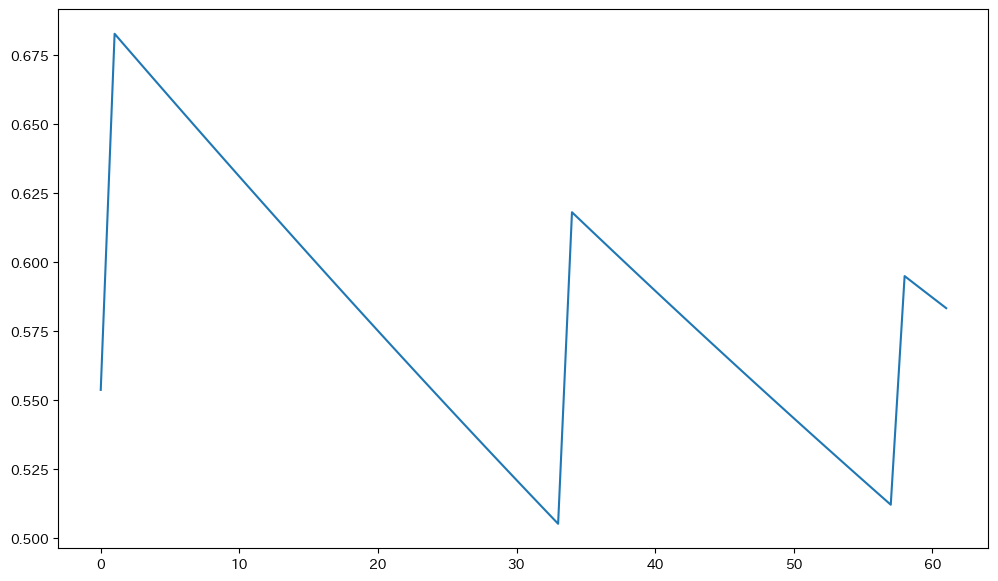

In [13]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(lis)

In [18]:
df2

Open          High           Low         Close  \
Date                                                                 
2014-08-01  16561.699219  16584.750000  16437.070312  16493.369141   
2014-08-04  16493.720703  16596.220703  16447.199219  16569.279297   
2014-08-05  16559.970703  16559.970703  16369.549805  16429.470703   
2014-08-06  16425.099609  16490.699219  16372.320312  16443.339844   
2014-08-07  16448.289062  16504.349609  16333.780273  16368.269531   
...                  ...           ...           ...           ...   
2024-01-02  37566.218750  37790.078125  37495.910156  37715.039062   
2024-01-03  37629.230469  37629.230469  37401.851562  37430.191406   
2024-01-04  37425.281250  37716.410156  37425.281250  37440.339844   
2024-01-05  37455.460938  37623.621094  37323.820312  37466.109375   
2024-01-08  37327.371094  37692.921875  37249.238281  37683.011719   

               Adj Close     Volume  Trade  
Date                                        
2014-08-01  16493.369141   84860000    0.0  
2014-08-04  16569.279297   76260000    0.0  
2014-08-05  16429.470703   76630000    0.0  
2014-08-06  16443.339844   78600000    0.0  
2014-08-07  16368.269531   80430000    0.0  
...                  ...        ...    ...  
2024-01-02  37715.039062  350280000    NaN  
2024-01-03  37430.191406  322010000    NaN  
2024-01-04  37440.339844  380220000    NaN  
2024-01-05  37466.109375  299480000    NaN  
2024-01-08  37683.011719  360909911    NaN  

[2375 rows x 7 columns]

[*********************100%%**********************]  1 of 1 completed
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_17892\2434660880.py:132: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


2023-08-01 00:00:00
loss_cut: 0 profit_count: 0
totalreturn: [35220.57714844] initiate_asset:16561.69921875


NameError: name 'lis' is not defined

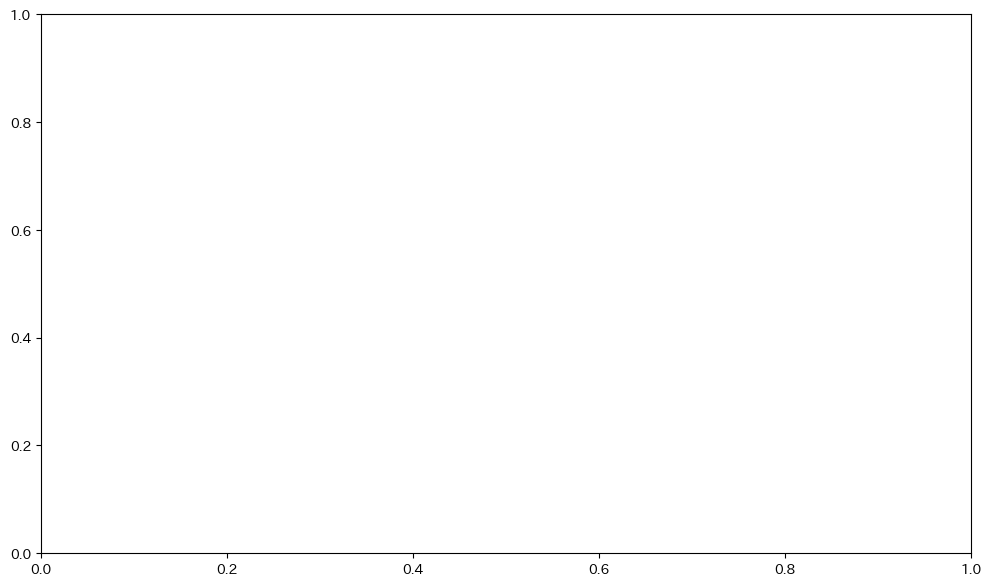

In [30]:
array=predict.index 
df2 = yf.download('^DJI', start='2014-08-01', interval='1d')
dfX = pd.DataFrame()
for i, j in enumerate(array):
    try:
        array[i+1]
    except:
        horizon = df2.loc[j:, :]
    else:
        horizon = df2.loc[j:array[i+1], :]
    try:
        op, cl, high, low = horizon.head(1)['Open'].values, horizon.tail(1)['Close'].values, max(horizon['High']), min(horizon['Low'])
    except:
        continue
    temp = pd.DataFrame({'Open':op, 'Close':cl, 'High':high, 'Low':low}, index=[j])
    dfX = pd.concat([dfX, temp])

data2['Trade']['2021-01-01':].head(10)

dfX['predict'] = [1 for i in range(len(dfX))]
df2['Trade'] = data2['Trade']
data = calc(
            data=dfX,
            losscut_rate=1, 
            profitlevel=1, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=1, 
            profitlevel2=1, 
            data2=df2)  

data.to_csv('data/NYdowMarket.csv')

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(lis)

(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 21
totalreturn: [151.07829243] initiate_asset:71.5999984741211
sharp ratio : 1.286376341885014
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 26.000 %


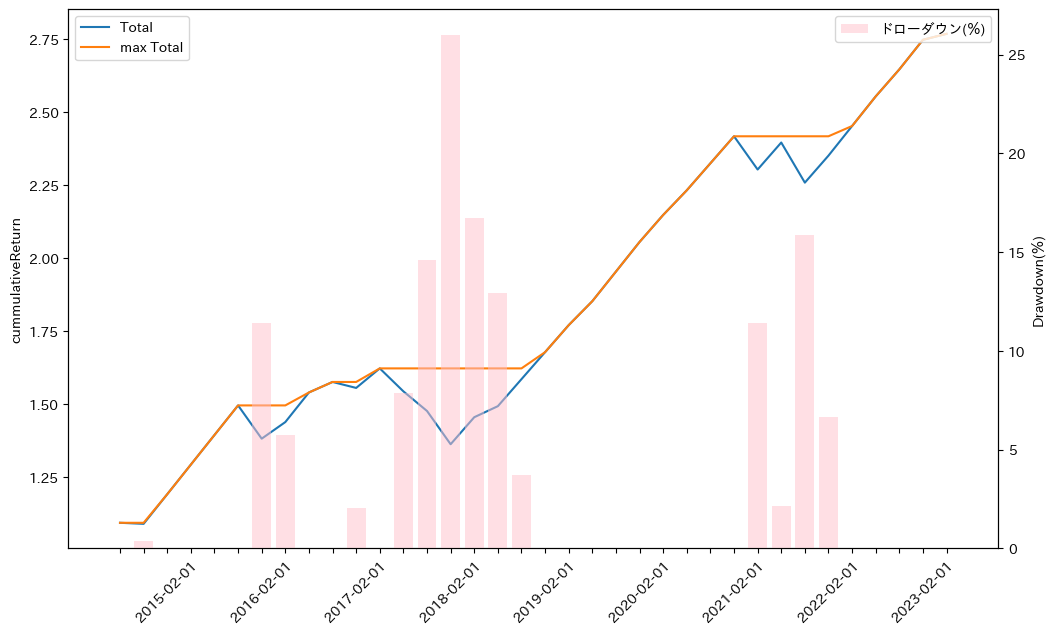

In [12]:
data =  price_and_predict["2014-08-01":"2023-06-01"]


df = calc(data=data,
        losscut_rate=last_losscut, 
        profitlevel=last_profitlevel, 
        reverse=False,
        leverage=1, # 第４因数は、Falseの方がデフォです。
        losscut2=sell_last_losscut, 
        profitlevel2=sell_last_profitlevel, 
        data2=data2)  
sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)
print(f"sharp ratio : {sharp_ratio*np.sqrt(4)}")
graph(df=df,
      save=False, 
      file_name="./graph_image/"+ticker+"graph", 
      simple_profit=True
     )

In [13]:
df.to_csv('testdata/25811start.csv')

In [11]:
1=2 # Run all でここまで実行する。

SyntaxError: cannot assign to literal (Temp/ipykernel_8184/224602424.py, line 1)

In [15]:
df

signal    Return  totalreturn   profitline  loss_cut   interest  \
2014-08-01     1.0  0.092600     6.708870      crossed      safe   6.708870   
2014-11-01     0.0 -0.003590     6.438865  not crossed      safe  -0.270004   
2015-02-01     0.0  0.101500    14.639051      crossed      safe   8.200185   
2015-05-01     0.0  0.101500    22.353051      crossed      safe   7.714000   
2015-08-01     0.0  0.101500    30.000060      crossed      safe   7.647010   
2015-11-01     0.0  0.101500    37.449145      crossed      safe   7.449085   
2016-02-01     0.0 -0.114000    29.746165  not crossed  Losscut.  -7.702980   
2016-05-01     0.0  0.056843    34.236163  not crossed      safe   4.489998   
2016-08-01     0.0  0.101500    42.712428      crossed      safe   8.476265   
2016-11-01     1.0  0.036053    45.412425  not crossed      safe   2.699997   
2017-02-01     0.0 -0.020486    43.802425  not crossed      safe  -1.610001   
2017-05-01     1.0  0.067002    49.002422  not crossed      safe   5.199997   
2017-08-01     1.0 -0.078716    42.722423  not crossed      safe  -6.279999   
2017-11-01     1.0 -0.067288    37.162425  not crossed      safe  -5.559998   
2018-02-01     0.0 -0.114000    28.789126  not crossed  Losscut.  -8.373300   
2018-05-01     1.0  0.092600    35.874877      crossed      safe   7.085752   
2018-08-01     1.0  0.037867    38.934882  not crossed      safe   3.060005   
2018-11-01     1.0  0.092600    46.380849      crossed      safe   7.445966   
2019-02-01     1.0  0.092600    54.110171      crossed      safe   7.729322   
2019-05-01     1.0  0.092600    62.166371      crossed      safe   8.056200   
2019-08-01     1.0  0.082109    69.656369  not crossed      safe   7.489998   
2019-11-01     0.0  0.101500    78.876628      crossed      safe   9.220260   
2020-02-01     0.0  0.101500    88.886559      crossed      safe  10.009930   
2020-05-01     1.0  0.092600    95.383375      crossed      safe   6.496816   
2020-08-01     1.0  0.084545   102.363378  not crossed      safe   6.980003   
2020-11-01     1.0  0.092600   110.153816      crossed      safe   7.790438   
2021-02-01     1.0  0.092600   118.449850      crossed      safe   8.296034   
2021-05-01     0.0 -0.114000   107.587930  not crossed  Losscut. -10.861920   
2021-08-01     1.0  0.092600   117.468350      crossed      safe   9.880420   
2021-11-01     1.0 -0.137500   102.333725  not crossed  Losscut. -15.134625   
2022-02-01     1.0  0.092600   111.877080      crossed      safe   9.543356   
2022-05-01     0.0  0.101500   121.538866      crossed      safe   9.661785   
2022-08-01     0.0  0.101500   131.945661      crossed      safe  10.406795   
2022-11-01     1.0  0.092600   140.021306      crossed      safe   8.075646   
2023-02-01     0.0  0.101500   149.358291      crossed      safe   9.336985   
2023-05-01     1.0  0.020382   151.078292  not crossed      safe   1.720001   

            open_price settlement day  ensuring_time  
2014-08-01   72.449997     2015-01-07            159  
2014-11-01   75.199997     2015-05-12            192  
2015-02-01   80.790001     2015-06-25            144  
2015-05-01   76.000000     2015-09-04            126  
2015-08-01   75.339996     2016-01-20            172  
2015-11-01   73.389999     2016-02-11            102  
2016-02-01   67.570000     2016-03-11             39  
2016-05-01   78.989998     2016-11-14            197  
2016-08-01   83.510002     2016-11-01             92  
2016-11-01   74.889999     2017-05-12            192  
2017-02-01   78.589996     2017-08-14            194  
2017-05-01   77.610001     2017-11-13            196  
2017-08-01   79.779999     2018-02-12            195  
2017-11-01   82.629997     2018-05-14            194  
2018-02-01   73.449997     2018-07-06            155  
2018-05-01   76.519997     2018-08-20            111  
2018-08-01   80.809998     2019-02-12            195  
2018-11-01   80.410004     2019-04-05            155  
2019-02-01   83.470001     2019-07-10      

In [30]:
df.query('signal==0').query('interest<0')['ensuring_time'].describe()

count      5.000000
mean     130.400000
std       71.079533
min       39.000000
25%       72.000000
50%      155.000000
75%      192.000000
max      194.000000
Name: ensuring_time, dtype: float64

In [ ]:
売り
平均 3.5か月(3.3)
中央　3.9か月(3.8)

In [20]:
#df.to_csv('testdata/'+ticker+'dataframe.csv')

In [15]:
dfY = df
dfY['year'] = dfY.index.year
dfY['month'] = dfY.index.month
table = {}
pd.set_option('display.max_rows', 20)
start = 2014
for year in range(start, 2023, 1):

    dfZ = dfY.query('year==@year')
    Max_asset = dfZ[['open_price']].max()
    Sum_profit = dfZ['interest'].sum()
    Return = Sum_profit / Max_asset.values
    #table[str(year+1)+ '.3'] = Max_asset
    table[str(year+1)+ '.3'] = Return
pd.DataFrame.from_dict(table, orient='index')

0
2015.3  0.085720
2016.3  0.130462
2017.3  0.050377
2018.3 -0.099843
2019.3  0.114269
2020.3  0.396753
2021.3  0.357805
2022.3 -0.070868
2023.3  0.443569

0
初期資金         75.199997
全トレード数            16.0
勝率              68.75%
負率              31.25%
全トレード平均利益     3.987131
勝ちトレード平均利益      8.4193
負けトレード平均利益   -5.763641
プロフィットファクター   3.213673

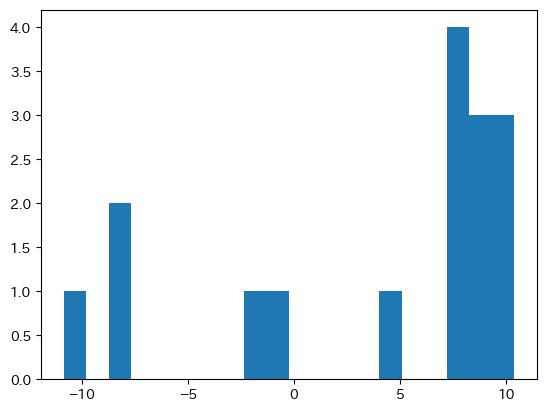

In [98]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal==0'))

C:\Users\admin\AppData\Local\Temp\ipykernel_1092\689576471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(df))]


(入力前の)シグナルが0なら売ります。
loss_cut: 0 profit_count: 0
totalreturn: [19.39002991] initiate_asset:71.5999984741211
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 26.000 %


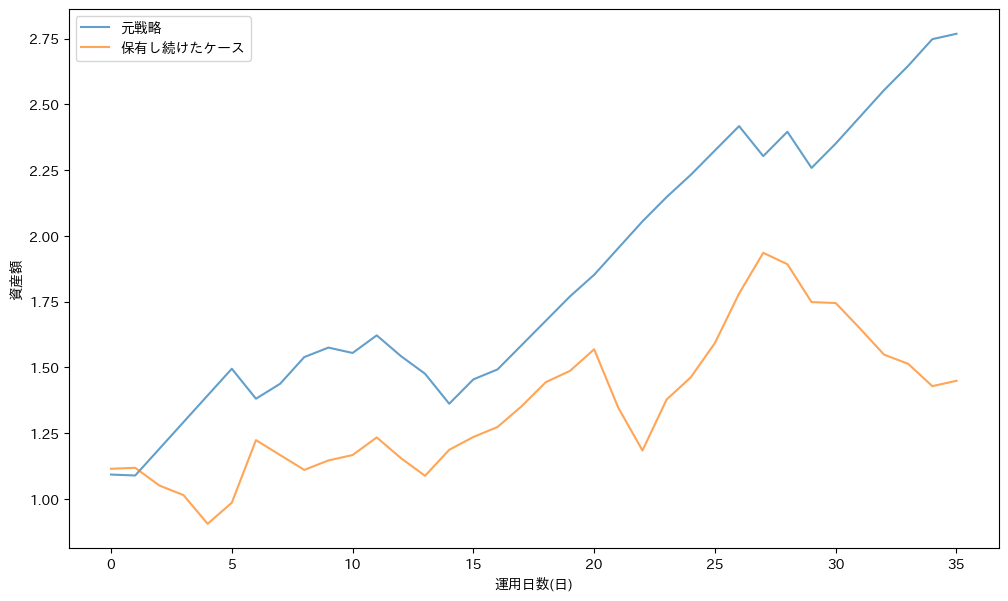

In [15]:

data['predict']= [1 for i in range(len(df))]
df3 = calc(data, 1, 1, False,1,1, data2)
def graph3(df, save, file_name, raw_data=df3, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp, temp2 = df["interest"].values, raw_data["interest"].values

        initial = df["open_price"][0] 
        lis = np.cumsum(temp) + initial
        lis2 = np.cumsum(temp2) + initial
        
        
        profit_month =np.array(lis)  / initial
        profit_month2 =np.array(lis2)  / initial

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        total2 = profit_month2

        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp, temp2 = df["Return"].values, raw_data["Return"].values

        

        profit_daily = temp
        profit_daily2 = temp2


        # 単利運用での資産額の計算(初日を1とする)
        total = 1 + np.cumsum(profit_daily) 
        total2 = 1 + np.cumsum(profit_daily2)

        
        # 日ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values 

        # ドローダウンの計算
        dd = max_assets - total # 単利運用なので初期資金(1)に対する額で計算
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.set_xlabel('運用日数(日)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='保有し続けたケース', alpha=0.7)

    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")

graph3(df=df, 
       save=False, 
       file_name='./graph_image/USReit_3mo2', 
       raw_data=df3, 
       simple_interest=True)

In [16]:
df3.to_csv('testdata/25811_raw.csv')